In [1]:
# importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
digits = load_digits()
X = digits.data
y = digits.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


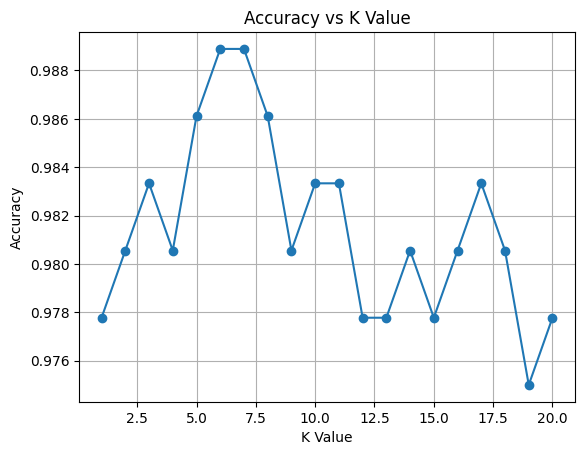

In [4]:
# plotting accuracy vs k value
scores = []
k_values = list(range(1, 21))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.plot(k_values, scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.grid()
plt.show()


In [5]:
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [6]:
best_k = grid.best_params_['n_neighbors']
best_model = grid.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Best K:", best_k)
print("Accuracy:", accuracy)


Best K: 1
Accuracy: 0.9777777777777777


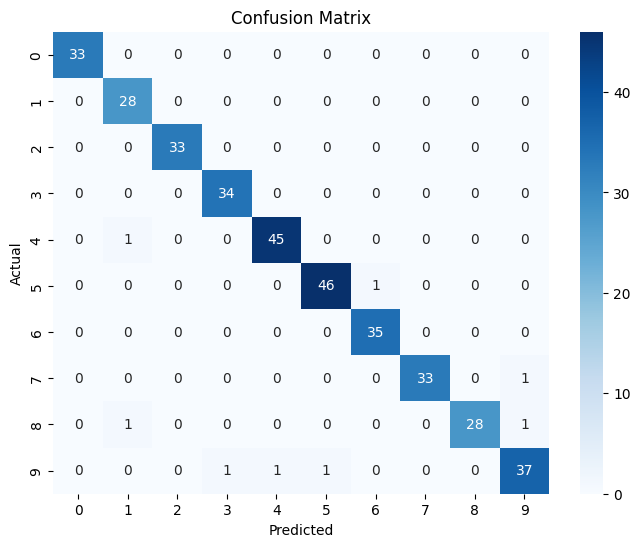

In [7]:
# plotting confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# plotting classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      0.98      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

